# ddG__ternary_classification

In [1]:
import pandas as pd

In [2]:
df_train = pd.read_csv('../src/ddg_ter_train.csv')
df_test = pd.read_csv('../src/ddg_ter_test.csv')
df_train.head(5)

,SecSt,ASA_pct,delta_MW,delta_Chg,delta_ARM,delta_Hydro,delta_VdwV,delta_SASA,ddG_calc,ddGC
0,4,0.00,14,0.0,0.0,0.091,20,22,1.893,unstable
1,1,75.20,55,1.0,0.0,-0.450,55,94,0.214,neutral
2,3,28.48,-44,0.0,0.0,0.051,-45,-92,1.411,unstable
3,3,89.51,-16,0.0,0.0,0.257,-6,-13,0.049,neutral
4,2,36.56,32,0.0,0.0,-0.087,19,43,1.238,unstable


In [3]:
def return_array(df:pd.DataFrame):
    X = df.iloc[:,0:len(df.columns)-1]
    df = df.replace({'ddGC': {'unstable' : 0, 
                                'neutral' : 1, 
                                'stable' : 2}})
    y = df['ddGC']
    return X,y

In [4]:
X_train, y_train = return_array(df_train)
X_test, y_test = return_array(df_test)

# Correlation

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

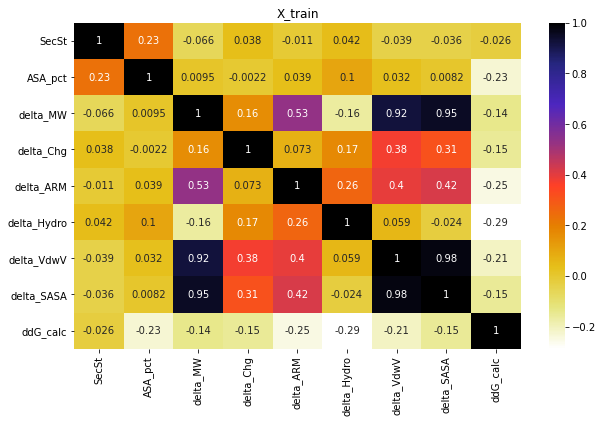

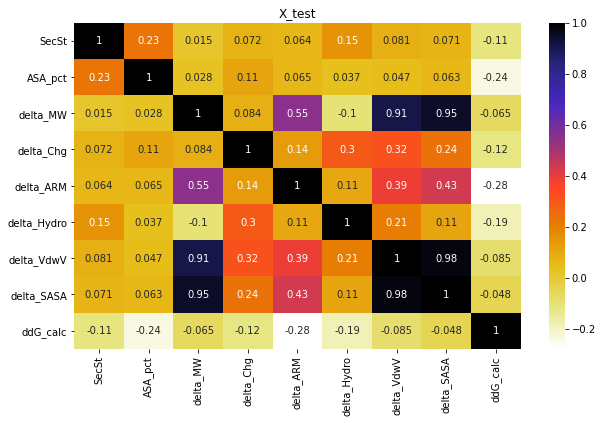

In [6]:
plt.figure(figsize=(10,6))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.title("X_train")
plt.show()

# delta_VdwV and delta_MW are correlated
# delta_SASA and delta_MW are correlated
# delta_SASA and delta_VdwV are correlated


plt.figure(figsize=(10,6))
cor = X_test.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.title("X_test")
plt.show()


# delta_VdwV and delta_MW are correlated
# delta_SASA and delta_MW are correlated
# delta_SASA and delta_VdwV are correlated

# Support Vector Machine

In [7]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.svm import SVC
import numpy as np
model = []
cv_accuracy = []
test_accuracy = []

# best params : {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}

clf = SVC(C=100,gamma='scale',kernel='rbf')

scores = cross_val_score(clf, X_train, y_train, cv=10, scoring="accuracy")
print(np.mean(scores))
cv_accuracy.append(np.mean(scores))

0.6757440476190476


In [8]:
from sklearn.metrics import classification_report, accuracy_score
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test,y_pred))
test_accuracy.append(accuracy_score(y_test,y_pred))
model.append("SVC")

              precision    recall  f1-score   support

           0       0.71      0.74      0.73        86
           1       0.51      0.60      0.55        57
           2       0.67      0.12      0.20        17

    accuracy                           0.62       160
   macro avg       0.63      0.49      0.49       160
weighted avg       0.63      0.62      0.61       160

0.625


# Random Forest

In [9]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

scores = cross_val_score(clf, X_train, y_train, cv=10, scoring="accuracy")
print(np.mean(scores))
cv_accuracy.append(np.mean(scores))

0.7132440476190476


In [10]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test,y_pred))
test_accuracy.append(accuracy_score(y_test,y_pred))
model.append("RF")

              precision    recall  f1-score   support

           0       0.76      0.87      0.81        86
           1       0.64      0.63      0.64        57
           2       0.80      0.24      0.36        17

    accuracy                           0.72       160
   macro avg       0.73      0.58      0.60       160
weighted avg       0.72      0.72      0.70       160

0.71875


# Naive-Bayes Classifier

In [11]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
scores = cross_val_score(clf, X_train, y_train, cv=10, scoring="accuracy")
print(np.mean(scores))
cv_accuracy.append(np.mean(scores))

0.6224206349206349


In [12]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test,y_pred))
test_accuracy.append(accuracy_score(y_test,y_pred))
model.append("NB")

              precision    recall  f1-score   support

           0       0.73      0.69      0.71        86
           1       0.54      0.65      0.59        57
           2       0.36      0.24      0.29        17

    accuracy                           0.62       160
   macro avg       0.55      0.52      0.53       160
weighted avg       0.62      0.62      0.62       160

0.625


# KNN Classifier

In [13]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier()
scores = cross_val_score(clf, X_train, y_train, cv=10, scoring="accuracy")
print(np.mean(scores))
cv_accuracy.append(np.mean(scores))

0.6193452380952381


In [14]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test,y_pred))
test_accuracy.append(accuracy_score(y_test,y_pred))
model.append("KNN")

              precision    recall  f1-score   support

           0       0.66      0.71      0.68        86
           1       0.48      0.56      0.52        57
           2       0.00      0.00      0.00        17

    accuracy                           0.58       160
   macro avg       0.38      0.42      0.40       160
weighted avg       0.52      0.58      0.55       160

0.58125


c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

#  Artificial Neural Network

In [15]:
from sklearn.neural_network import MLPClassifier

# best params: {'activation': 'tanh', 'alpha': 0.05, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'solver': 'adam'}

clf = MLPClassifier(activation='tanh',alpha=0.05,hidden_layer_sizes=(100,),learning_rate='constant',solver='adam',max_iter=3000)
clf.fit(X_train, y_train.values.ravel())

scores = cross_val_score(clf, X_train, y_train, cv=10, scoring="accuracy")
print(np.mean(scores))
cv_accuracy.append(np.mean(scores))

0.639608134920635


In [16]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test,y_pred))
test_accuracy.append(accuracy_score(y_test,y_pred))
model.append("ANN")

              precision    recall  f1-score   support

           0       0.76      0.79      0.77        86
           1       0.58      0.61      0.60        57
           2       0.40      0.24      0.30        17

    accuracy                           0.67       160
   macro avg       0.58      0.55      0.56       160
weighted avg       0.66      0.67      0.66       160

0.66875


# Overall

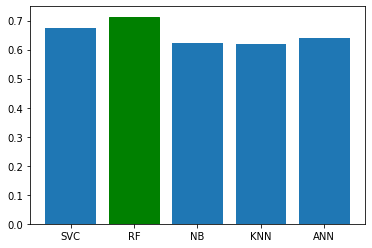

In [17]:
bar_list = plt.bar(model,cv_accuracy)
bar_list[1].set_color('green')